In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Advanced Learning Algorithms/Week 2/optional-labs

Mounted at /content/drive
/content/drive/My Drive/Advanced Learning Algorithms/Week 2/optional-labs


In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib inline
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [6]:
def my_softmax(z):
  ez = np.exp(z)
  sm = ez/np.sum(ez)

  return sm

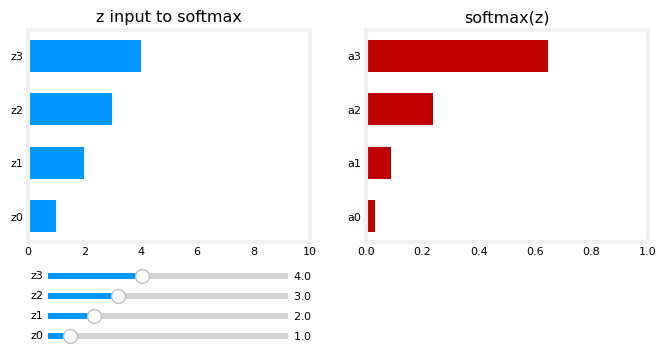

In [7]:
plt.close("all")
plt_softmax(my_softmax)

# Tensorflow Model

In [8]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

In [9]:
model = Sequential(
    [
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')
    ]
)


model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(
    X_train, y_train,
    epochs = 10
    )

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2122
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4790
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2131
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1154
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0888
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0674
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0505
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0488
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0445
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0487


In [15]:
p_notpreferred = model.predict(X_train)
print(p_notpreferred[:2])
print(f'largest value: {np.max(p_notpreferred):.3f}\n smallest value:, {np.min(p_notpreferred):.3f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[4.45e-03 2.90e-03 9.71e-01 2.12e-02]
 [9.94e-01 5.29e-03 3.34e-04 6.77e-05]]
largest value: 1.000
 smallest value:, 0.000


# Preferred Model

In [16]:
preferred_model = Sequential(
    [
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')
    ]
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(
    X_train, y_train,
    epochs = 10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0321
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0297
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0362
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0256
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0259
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0228
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0283
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0184


In [17]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
two example output vectors:
 [[-0.22  0.04  0.03 -0.61]
 [ 0.65 -0.03 -0.28  0.44]]
largest value 1.8987011 smallest value -3.46533


## Converting Outputs to Probabilities

In [18]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[0.23 0.31 0.3  0.16]
 [0.37 0.19 0.15 0.3 ]]
largest value 0.6537088 smallest value 0.002664857


In [20]:
for i in range(10):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-0.22  0.04  0.03 -0.61], category: 1
[ 0.65 -0.03 -0.28  0.44], category: 0
[ 0.53 -0.03 -0.22  0.35], category: 0
[ 0.53 -0.05 -0.12  0.12], category: 0
[-0.53  0.16 -0.73 -0.39], category: 1
[-0.42  0.05 -0.04 -0.62], category: 1
[ 0.62  0.08  0.02 -0.17], category: 0
[ 0.31  0.07 -0.46  0.45], category: 3
[ 0.62 -0.07 -0.15  0.15], category: 0
[ 0.78  0.42  0.51 -1.84], category: 0
